<a href="https://colab.research.google.com/github/AlejandroLopez105/Computacion3/blob/master/Optimizaci%C3%B3n%20Multidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computación III -Unidad I
+ Autor : Miguel Alejandro López Olvera
+ Contacto: alexander_105@live.com 
+ 05-10-2020

#Optimización en una dimensión
+ Búsqueda exhaustiva
+ Método de Newton 
+ Método de la sección aurea 



#Clase Optimización 
+ Búsqueda exhaustiva
+ Método de Newton
+ Método de la sección aurea


In [37]:
class Optimization:
  def __init__(self,func, tol,maxIter):
    self.tol = tol
    self.maxIter = maxIter
    self.func = func

  def Exhaustive_search(self, inicio, fin):
    x_a = np.arange(inicio,fin+1)
    y_a = np.zeros(len(x_a))
    y_a_muestreo = np.zeros(9)
    max = -99999999
    min = 999999999
    index_min = 0
    index_max = 0
    for i in x_a:
      y_a[i] = self.func.subs(x,x_a[i])
      a=0.1
      if(y_a[i]<min):
        min = y_a[i]
        index_min = x_a[i]
      for j in range(9):
        subs = x_a[i]+a
        y_a_muestreo[j] = self.func.subs(x,subs)
        if(y_a_muestreo[j] > max):
          max = y_a_muestreo[j]
          index_max = subs
        if(y_a_muestreo[j] < min):
          min = y_a_muestreo[j]
          index_min = subs
        a+=0.1
    return min,max,index_min,index_max
  def Newton_method(self, der1, der2, variable):
    #valor inicial
    x_1 = float(1)
    #inicializar error (delta)
    error = 99999#valor inicial para el error, se actualizará en el ciclo
    count = 0
    start_time_Newton = time()
    while self.tol<error and count <self.maxIter:
      #Xk1 = xk - eval(f'(xf))/eval(f''(xk))
      x_2 = x_1 - (der1.subs(variable,x_1)/der2.subs(variable,x_1))
      #error = abs(actual-anterior)
      error = abs(x_1-x_2)
      #count += 1
      count += 1
      #xk =Xk1
      x_1 = x_2
    return x_1

  def Golden_ratio_method(self, f, x_l, x_u, variable):
    prop = (float(sqrt(5))-1)/2
    conteo=0
    while(abs(x_u-x_l) > self.tol and conteo<self.maxIter):
      d = prop*(x_u-x_l)
      x_1 = x_l + d
      x_2 = x_u - d
      eval_x1 = f.subs(variable,x_1)
      eval_x2 = f.subs(variable,x_2)

      if(eval_x1 < eval_x2):
        x_l = x_2
        x_2 = x_1
        x_1 = x_l + (prop*(x_u-x_l))
      elif(eval_x2 < eval_x1):
        x_u = x_1
        x_1 = x_2
        x_2 = x_u - (prop*(x_u-x_l))
      conteo+=1
    return x_1

  def gradiente(self, f, a, b):

      elevacion = f.subs([(x,a), (y, b)])

      # Primer derivada parcial con respecto de x
      derx = diff(f, x)

      # Segeunda derivada parcial con respecto de x
      der2x = diff(derx,x)
      i = derx.subs([(x,a), (y, b)])

      # Primer derivdad parcial con respecto de y
      dery = diff(f, y)

      # Segunda derivada parcial con respecto de y
      der2y = diff(dery,y)

      # Segunda derividad con respecto de x y y
      derxy = diff(f, x, y)
      
      j = dery.subs([(x,a), (y, b)])

      # Ejemplo de sustutución 
      # Haciendo una sustitución de x y 
      x_h = a + i*(h)
      y_h = b + j*(h)
      
      # sustituyendo x por x_h
      g_h = f.subs([(x, x_h), (y, y_h)])
      g_prime_h = float(sqrt((i*i) + (j*j)))

      #Hessiana 
      Hess = der2x*der2y - (derxy*derxy)
      det_Hess = Hess.subs([(x,a), (y,b)])
      return g_prime_h, g_h, det_Hess
  
  


#Graficación de métodos y puntos


In [38]:
class Graph:
  def __init__(self,func):
    self.func = func

  def PlotFunction(self,inicio,fin):
    x_a = np.linspace(-1, 2.5, 10000)
    y_a = np.zeros(len(x_a))

    for i in range(len(x_a)):
      y_a[i] = self.func.subs(x, x_a[i])
    plt.title("Búsqueda Exhaustiva")
    plt.xlabel("Variable independiente")
    plt.ylabel("Variable dependiente")
    # Generar gráfico usando x_a y y_a
    plt.plot(x_a, y_a, label = self.func)
    # Desplegar lyenda
    plt.legend(loc = 'best')

  def plotPoint(self,x,y,legend,color, mark):
    plt.scatter(x, y, label = legend, c = color, marker = mark)
    plt.legend(loc= "best")

  def saveFigure(self, title, quality):
    plt.savefig(title, dpi = quality, bbox_inches = 'tight')

  def evalFunction(self, x, y):
      Z = 2 *x*y + 2*x - x**2 - 2*y**2
      return Z

  def crearGrafico3D(self):
      return plt.axes(projection='3d')

  # Metodo para graficar una superficie de tres dimensiones
  def plotSurface(self, f, inicioX, finX, inicioY, finY, ax):
      
      # Generara valores para cada eje
      X = np.linspace(inicioX, finX, 100)
      Y = np.linspace(inicioY,finY, 100)

      # Generar un grid (matriz)
      X, Y = np.meshgrid(X,Y)
      print("Len(X)", len(X),  " Len(X[0])", len(X[0]))

      Z = self.evalFunction(X,Y)

      """Z1 = np.zeros((len(X), len(Y)))

      # sustitución
      for i in range(len(X)):
          for j in range(len(Y)):
              Z1[i][j] = f.subs([(x, X[i]), (y, Y[j])])"""
      
      # Generar gráfico en matplotlib
      fig = plt.figure()

      ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
              cmap='viridis', edgecolor='none')
      
      ax.set_title("Function: " + str(f));

  # Función para desplegar un punto o puntos en 3D (scatter)
  def plot3DPoint(self, x, y, z, l, ax):
      #fig = plt.figure()
      #ax = plt.axes(projection='3d')
      ax.scatter(x, y, z, label = l)
      ax.legend(loc = "best")


  def crearGrafico3D(self):
      return plt.axes(projection='3d')

  # Metodo para graficar una superficie de tres dimensiones
  def plotSurface(self, f, inicioX, finX, inicioY, finY, ax):
      
      # Generara valores para cada eje
      X = np.linspace(inicioX, finX, 100)
      Y = np.linspace(inicioY,finY, 100)

      # Generar un grid (matriz)
      X, Y = np.meshgrid(X,Y)
      print("Len(X)", len(X),  " Len(X[0])", len(X[0]))

      Z = self.evalFunction(X,Y)

      """Z1 = np.zeros((len(X), len(Y)))

      # sustitución
      for i in range(len(X)):
          for j in range(len(Y)):
              Z1[i][j] = f.subs([(x, X[i]), (y, Y[j])])"""
      
      # Generar gráfico en matplotlib
      #fig = plt.figure()

      ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
              cmap='viridis', edgecolor='none')
      
      ax.set_title("Ascenso Pronunciado Óptimo")
      #ax.set_title("Function: " + str(f));

  # Función para desplegar un punto o puntos en 3D (scatter)
  def plot3DPoint(self, x, y, z, l, ax):
      #fig = plt.figure()
      #ax = plt.axes(projection='3d')
      ax.scatter(x, y, z, label = l)
      ax.legend(loc = "best")


#Definición de método Main

Optimal steep ascent method run time: 0.11614251136779785
Local Maximum
Punto máximo: (1.99999539200000, 0.999996928000000)
1.9999999999882034
Len(X) 100  Len(X[0]) 100


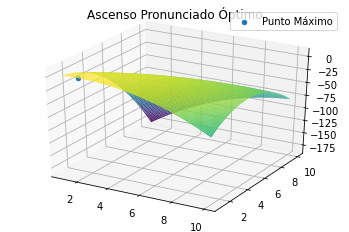

In [39]:
from sympy import *
import matplotlib.pyplot as plt
from sympy.abc import x, y, h, z
import numpy as np
import matplotlib
from time import time
import matplotlib.pyplot as plt
#habilitar impresión avanzada con latex
init_printing(use_unicode=True)

def main():
  func = x**4-3*x**3+2*x
  #func=x**2 + 2*x
  tol = 0.0001
  maxIter = 1000
  inicio = -100
  fin = 100

  der1 = diff(func)
  der2 = diff(der1)

  objOpt = Optimization(func, tol, maxIter)

  start_time_ES = time()
  min,max,index_min,index_max = objOpt.Exhaustive_search(inicio,fin)
  time_ES = time()-start_time_ES

  start_Newton = time()
  x_1_newton = objOpt.Newton_method(der1,der2,"x")
  time_Newton = time() - start_Newton

  start_Golden = time()
  x_1_golden = objOpt.Golden_ratio_method(func, inicio, fin, "x")
  time_Golden_ratio = time() - start_Golden

  """print("Exhaustive search: " + str(index_min))
  print("\t Time: " + str(time_ES) + "\n")
  print("Newton method: " + str(x_1_newton))
  print("\t Time: " + str(time_Newton) + "\n")
  print("Golden search method: " + str(x_1_golden))
  print("\t Time: " + str(time_Golden_ratio) + "\n")"""

  objGraph = Graph(func)
  """objGraph.PlotFunction(inicio,fin)

  minOrMax_Newton = der2.subs(x,x_1_newton)
  minOrMax_Golden = der2.subs(x,x_1_golden)

  if(der1.subs(x,index_min) < tol):#almost 0
    objGraph.plotPoint(index_min, min, "Minimum-Exhaustive Search", "b", ">")
  elif(der1.subs(x,index_max) < tol):#almost 0
    objGraph.plotPoint(index_max, max, "Maximum-Exhaustive Search", "b",">")

  if(minOrMax_Newton > 0):
    objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Minimum-Newton", "r","v")
  elif(minOrMax_Newton < 0):
    objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Maximum-Newton", "r","v")

  if(minOrMax_Golden > 0):
    objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Minimum-Golden Search", "g","<")
  elif(minOrMax_Golden < 0):
    objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Maximum-Golden Search", "g","<")
  
  #objGraph.saveFigure("Optimization",300)"""

  start_time_APO = time()
  f2 = 2*x*y+2*x-x**2-2*y**2

  f2derx = diff(f2,x)
  f2dery = diff(f2,y)
  a = -1
  b = 1
  g_prime, g_h , det_Hess= objOpt.gradiente(f2,a,b)
  tol =0.00001
  g_h_prime = diff(g_h,h)
  g_h_dprime = diff(g_h_prime)
  a1=0
  a2=0
  while(g_prime > tol):
    a1 = 0
    b1 = 0
    hMax = objOpt.Newton_method(g_h_prime,g_h_dprime, "h")
    a1 = a + (f2derx.subs([(x,a),(y,b)]))*hMax
    b1 = b + (f2dery.subs([(x,a),(y,b)])*hMax)

    g_prime, g_h , det_Hess= objOpt.gradiente(f2,a1,b1)
    g_h_prime = diff(g_h,h)
    g_h_dprime = diff(g_h_prime)
    a = a1
    b = b1
  time_APO = time()-start_time_APO

  
  f2Dderx = diff(f2derx,x)
  evalDderx = f2Dderx.subs([(x,a),(y,b)])

  print("Optimal steep ascent method run time: "+ str(time_APO))
  if(det_Hess > 0 and evalDderx > 0):
    print("Local minimum")
  elif(det_Hess > 0 and evalDderx < 0):
    print("Local Maximum")
  else:
    print("Saddle point")
  """g_h = simplify(g_h)
  print(g_prime)
  print(g_h)
  print(det_Hess)
  print(hMax)
  print(a1)"""
  print("Punto máximo: " + "("+str(a1)+", "+ str(b1)+")")
  z_value = float(f2.subs([(x,a1),(y,b1)]))
  print(str(z_value))
  #Comenzando a graficar en 3D
  ax = objGraph.crearGrafico3D()

  X = a1 
  Y = b1
  Z = z_value

  objGraph.plot3DPoint(X,Y,Z,"Punto Máximo",ax)
  objGraph.plotSurface(f2,1,10,1,10,ax)
  objGraph.saveFigure("APO",300)
if __name__ == "__main__":
  main()